In [1]:
import numpy as np
import scipy.integrate as integrate

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook
%config InlineBackend.figure_format='retina'

In [2]:
"""Cartesian velocity to Spherical velocity."""
def c_to_s_vel(pos,vel): # both in cartesian!
    s_vel = []
    for i, c_vel in enumerate(vel):
        xd,yd,zd = c_vel[0],c_vel[1],c_vel[2]
        x,y,z = pos[i][0],pos[i][1],pos[i][2]
        rd = (x*xd+y*yd+z*zd)/np.sqrt(pow(x,2)+pow(y,2)+pow(z,2))
        td = (xd*y-x*yd)/(pow(x,2)+pow(y,2))
        pd = (z*(x*xd+y*yd)-(pow(x,2)+pow(y,2))*zd)/((pow(x,2)+pow(y,2)+pow(z,2))*np.sqrt(pow(x,2)+pow(y,2)))
        s_vel.append([rd,td,pd])
    return s_vel

In [3]:
"""Spherical velocity to Cartesian velocity."""
def s_to_c_vel(pos,vel): # position in cartesian, velocity in spherical!
    c_vel = []
    for i, s_vel in enumerate(vel):
        rd,td,pd = s_vel[0],s_vel[1],s_vel[2]
        x,y,z = pos[i][0],pos[i][1],pos[i][2]
        xd = (x/np.sqrt(pow(x,2)+pow(y,2)+pow(z,2)))*rd+y*td+((z*x)/np.sqrt(pow(x,2)+pow(y,2)))*pd
        yd = (y/np.sqrt(pow(x,2)+pow(y,2)+pow(z,2)))*rd-x*td+((z*y)/np.sqrt(pow(x,2)+pow(y,2)))*pd
        zd = (z/np.sqrt(pow(x,2)+pow(y,2)+pow(z,2)))*rd-(np.sqrt(pow(x,2)+pow(y,2))*pd)
        c_vel.append([xd,yd,zd])
    return c_vel

In [4]:
"""Cartesian position to spherical position."""
def cart_to_sph(arr):
    sph_list = []
    for coord in arr:
        x,y,z = coord[0],coord[1],coord[2]
        r  = np.sqrt(pow(x,2)+pow(y,2)+pow(z,2))
        th = np.arccos(z/r)
        ph = np.arctan(y/x)
        sph_list.append([r,th,ph])
    return sph_list

In [5]:
"""Spherical position to cartesian position."""
def sph_to_cart(arr):
    cart_list = []
    for coord in arr:
        r,t,p = coord[0],coord[1],coord[2]
        x = r*np.sin(t)*np.cos(p)
        y = r*np.sin(t)*np.sin(p)
        z = r*np.cos(t)
        cart_list.append([x,y,z])
    return cart_list

## Let's define our Lorentz Force function to integrate:

In [6]:
def lorentz(t,R,q,m):
    r, theta, phi    = R[0], R[1], R[2] # retrieve spherical positions,
    vr, vtheta, vphi = R[3], R[4], R[5] # spherical velocities.

    return np.array([vr,vtheta,vphi, 
                     (q/m)*((-B0*(RE/r)**3)*np.sin(theta+alpha))*vr,        # vr x B(dipole)
                     -vtheta*(q/m)*(-2*(B0*(RE/r)**3)*np.cos(theta+alpha)), # vt x B(dipole)
                     vphi*(q/m)*(-2*(B0*(RE/r)**3)*np.cos(theta+alpha))-    # vp x B(dipole)
                     vphi*(q/m)*(-(B0*(RE/r)**3)*np.sin(theta+alpha))])

In [7]:
dt = 0.1
t  = np.arange(0.0, 500, dt)

q=1; m=1; B0 = 1; RE = 1; alpha = np.radians(0);
initial_conditions = [2.0049, 1.52, 0.049, -0.039, -0.00098, -0.00097]
initial_conditions = [1,1,1, 1,1,1]

<IPython.core.display.Javascript object>


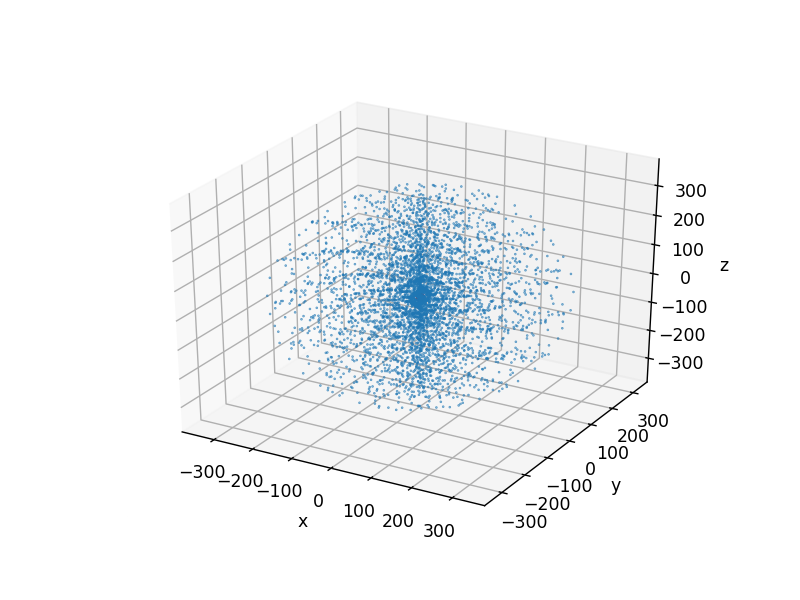

0.7080734182735713


In [8]:
positions = integrate.odeint(func=lorentz,y0=initial_conditions,t=t,args=(q,m),tfirst=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # initialize a 3-D plot.

cart = np.array(sph_to_cart(positions[:,:3]))
cartvel = np.array(s_to_c_vel(cart, positions[:,3:6]))
print(cartvel.T[1][0])

ax.scatter3D(cart.T[0], cart.T[1], cart.T[2],alpha=0.75,s=0.2) # solution x, y, z
ax.scatter3D(cart.T[0][0],cart.T[1][0],cart.T[2][0],color='red',s=20)

plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="hotpink")

In [55]:
N = 50

In [56]:
randy = (np.random.random(N)*10)-5
randz = (np.random.random(N)*10)-5

<IPython.core.display.Javascript object>


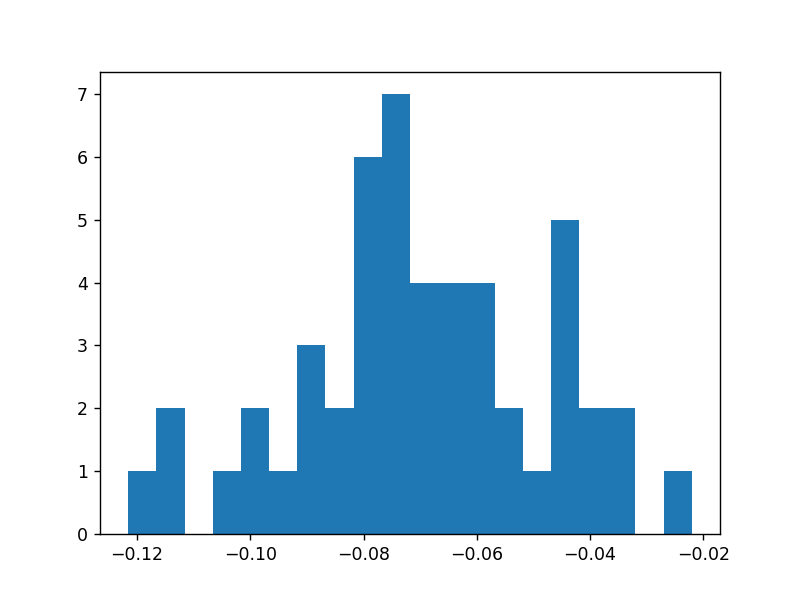

In [57]:
# the center location comes from typical solar wind speed ~500 km/s.
# we know the Earth's radius is 6371 km: if we scale this to 1 unit of distance,
# we find that typical solar wind speeds account for 0.0785 km scales.
# solar wind varies by +- 250 km/s. Same calculation yields an approximate width or scale of 0.04.
randvx = np.random.normal(loc=-0.078480615288,scale=0.039240307644/2,size=N)
randvy = np.random.normal(loc=0,scale=0.078/10,size=N)
randvz = np.random.normal(loc=0,scale=0.078/10,size=N)

vC = np.array([randvx])
fig = plt.figure()
plt.hist(vC[0],bins=20);

From electrodynamics, we know that the motion (Lorentz force) experienced by a particle goes as:
$$
\begin{align}
 \frac{\vec{F}}{m} & = \vec{a} = \frac{d\vec{v}}{dt},\\
 \frac{d\vec{v}}{dt} & = \frac{q}{m}(\vec{v}\times\vec{B})
   \end{align} $$

In [58]:
x0 = []
for i,item in enumerate(randy):
    x0.append([50, randy[i], randz[i]])
#     x0.append([50, 0.01, 0.01])

v0 = []
for i,item in enumerate(vC[0]):
    v0.append([item, randvy[i], randvz[i]])

v0 = c_to_s_vel(x0,v0) # both inputs need to be cartesian!
x0 = cart_to_sph(x0)   # now we can convert positions to spherical.

In [59]:
dt = 0.1
t  = np.arange(0.0, 1000, dt)
q=1; m=1; B0 = 1; RE = 1; alpha = np.radians(0);

<IPython.core.display.Javascript object>


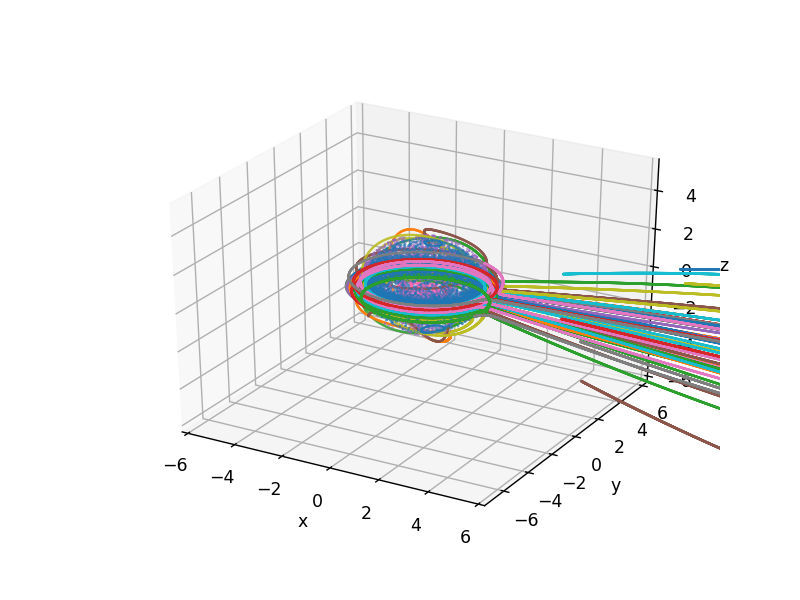

In [61]:
posList = []
for index, particle in enumerate(x0):
    initial_conditions = np.concatenate((x0[index], v0[index]))
    
    positions = integrate.odeint(func=lorentz,y0=initial_conditions,t=t,args=(q,m),tfirst=True)
    posList.append(positions)
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # initialize a 3-D plot.

for positions in posList:
    cart = np.array(sph_to_cart(positions[:,:3]))
    cartvel = np.array(s_to_c_vel(cart, positions[:,3:6]))

    ax.scatter3D(cart.T[0], cart.T[1], cart.T[2],alpha=0.75,s=0.2) # solution x, y, z
    ax.scatter3D(cart.T[0][0],cart.T[1][0],cart.T[2][0],color='red')

plt.xlabel('x')
plt.xlim(-6,6)
plt.ylabel('y')
ax.set_zlabel('z')

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="hotpink")